<div class="alert alert-block alert-info">
<h3>Student(s) Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: Alden Lu<br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>:al1168 <br>
<b>NetID 2 (optional)</b>:<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: AL     


<h3>Grader Notes</h3>
    don't mind the random tweets from my twitter account :) But I hope you are having a great day :DDD
    I did the 2.1 for fun idk if it's extra credit but didn't do 7.1. My data for the PCA graph and Joint graph is somewhat off 
    I also left in my keys file for convenience 

<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

### CS 439 - Introduction to Data Science
### Fall 2021

# Midsemester Project : Twitter Data Analysis

### Due Date : November 14th, 2021 by 11:59 PM


### About this project
This is your mid-semester project. You are allowed to work with a partner (if you'd like). Only one partner (or max two per group is allowed). The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. Moreoover, Trump tweets has become so consequential, they actually can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
from pathlib import Path
import re

## Downloading Recent Tweets
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [2]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
!pip install tweepy
import tweepy

## PART 1:  Accessing Twitter API  (optional for individuals)
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder. PART 1 is optional for those working by themselves. However, we highly recommend that you do Part 1 (after completing the project with offline data) if you would like to "learn" how to use Twitter API that might be useful.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en/apply/) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


In [3]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o erros or warnings and display Rutgers University's twitter username

In [4]:
import tweepy
from tweepy import TweepyException
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    redirect_url = auth.get_authorization_url()
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)
except TweepyException as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Rutgers username is: Rutgers University


## PART 2 - Working with Twitter
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [6]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

### Task 2.1 (Optional for Individuals)

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [7]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",|
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN SOLUTION
    with open(path) as d:
        dictData = json.load(d)
        return(dictData)
    # your solution here
    return None
    ### END SOLUTION

In [8]:
keys = load_keys(key_file)
print(keys)

{'consumer_key': 'fEKzkUrRJLm9B8GLuFmBjecby', 'consumer_secret': 'w03hsWBNNiYpA0J5SiklPrvD1wHq0WHDPLRNll5ASrTbEg3Coe', 'access_token': '1333297026369515520-whEtuo7mJTy6pc57n4Jxml5gWiE9Fj', 'access_token_secret': '9LjpipZdVdUKgEk9sX4oWnCPwc9OvhFMn6VtTwhrAwl6m'}


In [9]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    savepath = 'data/'+str(user_account_name)+'_recent_tweets.json'
    ### BEGIN SOLUTION
    example_tweets = None
    try:
        auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
        redirect_url = auth.get_authorization_url()
        auth.set_access_token(keys["access_token"], keys["access_token_secret"])
        api = tweepy.API(auth)
    except TweepyException as e:
        logging.warning("There was a Tweepy error. Double check your API keys and try again.")
        logging.warning(e)
    if not Path(savepath).is_file():
        example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name=user_account_name,tweet_mode='extended').items()]
        with open(savepath, "w") as f:        
            json.dump(example_tweets, f)
    
    return example_tweets
    # your solution here
    
    ### END SOLUTION

In [10]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    example_tweets = None
    ### BEGIN SOLUTION
    with open(path, "r") as f:
        example_tweets = json.load(f)
    # your solution here
    return example_tweets
    ### END SOLUTION

In [11]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    result = 'None'
    ### BEGIN SOLUTION
    savepath = 'data/'+str(user_account_name)+'_recent_tweets.json'
    if Path(savepath).is_file():
        result = load_tweets(savepath)
    else:
    # your solution here
        result = download_recent_tweets_by_user(user_account_name,load_keys(keys_path))
    return result
    
    
    ### END SOLUTION

If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by @RutgersU. (This may take a few minutes)

In [12]:
wooween1_tweets = get_tweets_with_cache('Wooween1',key_file)
df_woo=pd.DataFrame(wooween1_tweets)
df_woo

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,retweeted_status
0,Sun Nov 14 22:12:57 +0000 2021,1460007875644903433,1460007875644903433,"My dream job has been anything technology-related @RiotCareers. I am not qualified right now, but I will make it happen!",False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'RiotCareers', 'name': 'Riot Games Careers', 'id': 276958246, 'id_str': '276958246', 'indices': [50, 62]}], 'urls': []}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,...,None,False,0,0,False,False,en,NaN,NaN,NaN
1,Fri Nov 12 13:06:08 +0000 2021,1459145488175964171,1459145488175964171,@Kobe_Da_Gamer @Doublelift1 Bad take,False,"[28, 36]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kobe_Da_Gamer', 'name': 'SmokingWolf', 'id': 3241385710, 'id_str': '3241385710', 'indices': [0, 14]}, {'screen_name': 'Doublelift1', 'name': 'Yiliang Peng', 'id': 344538810, 'id_str': '344538810', 'indices': [...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.458959e+18,1458959453114585093,...,None,False,0,0,False,False,en,NaN,NaN,NaN
2,Wed Nov 10 18:29:05 +0000 2021,1458501985636962311,1458501985636962311,@CashApp Cashapp the anime,False,"[9, 26]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'CashApp', 'name': 'Cash App', 'id': 1445650784, 'id_str': '1445650784', 'indices': [0, 8]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.458261e+18,1458261453224521730,...,None,False,0,1,False,False,en,NaN,NaN,NaN
3,Tue Nov 09 01:29:11 +0000 2021,1457882930282381325,1457882930282381325,@fuslie @eaJPark @edisonparklive EAJ @Twitch.tv oh....,False,"[33, 54]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'fuslie', 'name': 'leslie', 'id': 3013777044, 'id_str': '3013777044', 'indices': [0, 7]}, {'screen_name': 'eaJPark', 'name': 'eaJ', 'id': 3385125854, 'id_str': '3385125854', 'indices': [8, 16]}, {'screen_name':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.457781e+18,1457780990651158530,...,None,False,0,0,False,False,in,NaN,NaN,NaN
4,Wed Nov 03 16:00:29 +0000 2021,1455927874561744896,1455927874561744896,@OfflineTV @CashApp Thank you Thank you Thank you so much!!!!!! I love you all! https://t.co/Snex3BIXcY,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'OfflineTV', 'name': 'OfflineTV', 'id': 881931326114324480, 'id_str': '881931326114324480', 'indices': [0, 10]}, {'screen_name': 'CashApp', 'name': 'Cash App', 'id': 1445650784, 'id_str': '1445650784', 'indices...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,None,False,0,1,False,False,en,"{'media': [{'id': 1455927870673596432, 'id_str': '1455927870673596432', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/FDR-rz4XMBA9vdo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FDR-rz4XMBA9vdo.jpg', 'url': 'https://t.co/Snex3BIXcY', 'display_url': ...",False,NaN
5,Tue Nov 02 04:57:44 +0000 2021,1455398700927291394,1455398700927291394,"@iiTzTimmy Yo dad, u’ve done enough",False,"[11, 35]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'iiTzTimmy', 'name': 'Timmy', 'id': 881974290656178176, 'id_str': '881974290656178176', 'indices': [0, 10]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.455118e+18,1455117936893444098,...,None,False,0,0,False,False,en,NaN,NaN,NaN
6,Thu Oct 14 04:16:44 +0000 2021,1448503009659572225,1448503009659572225,"@imane @AriaSaki @imane Thanks for the war, it was very entertaining!",False,"[17, 69]","{'hashtags': [], 'symb

In [13]:
# When you are done, run this cell to load @RutgersU 's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.
rutgers_tweets = get_tweets_with_cache("RutgersU", key_file)
print("Number of tweets downloaded:", len(rutgers_tweets))

Number of tweets downloaded: 3237


### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [14]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [15]:
dest_path = 'data/2017-2018.json'
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [16]:
assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to task 2.3.

### Task 2.3

Find the number of the month of the oldest tweet.

In [17]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 10

trump_tweets = pd.DataFrame(trump_tweets)
# type(trump_tweets['created_at'])
trump_tweets2 = trump_tweets.copy()
trump_tweets2['created_at'] = pd.to_datetime(trump_tweets2['created_at'])
trump_tweets2 = trump_tweets2.sort_values(by='created_at')
trump_tweets2.head()
### BEGIN SOLUTION
# print(min(trump_tweets['created_at']))
# print(trump_tweets.dtypes)
# trump_tweets[trump_tweets.created_at==trump_tweets.created_at.max()]

# print(trump_tweets['id'])
#*** code to compute **** 

### END SOLUTION

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
3213,2017-10-19 11:56:15+00:00,920981920787386368,920981920787386368,"Workers of firm involved with the discredited and Fake Dossier take the 5th. Who paid for it, Russia, the FBI or the Dems (or all)?",False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,24788,83417,False,False,NaN,en,NaN,NaN
3212,2017-10-19 12:21:18+00:00,920988223362469891,920988223362469891,".@foxandfriends ""Russia sent millions to Clinton Foundation""",False,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'foxandfriends', 'name': 'FOX & friends', 'id': 15513604, 'id_str': '15513604', 'indices': [1, 15]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,23219,69861,False,False,NaN,en,NaN,NaN
3211,2017-10-19 20:40:21+00:00,921113816053755904,921113816053755904,It was great to have Governor @RicardoRossello of #PuertoRico🇵🇷with us at the @WhiteHouse today. We are with you! #PRStrong https://t.co/Op2xDZxvNc,False,"[0, 123]","{'hashtags': [{'text': 'PuertoRico', 'indices': [50, 61]}, {'text': 'PRStrong', 'indices': [114, 123]}], 'symbols': [], 'user_mentions': [{'screen_name': 'ricardorossello', 'name': 'Ricardo Rossello', 'id': 80013913, 'id_str': '80013913', 'indices': [30, 46]}, {'screen_name':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,10158,47493,False,False,False,en,"{'media': [{'id': 921113597752807431, 'id_str': '921113597752807431', 'indices': [124, 147], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/921113597752807431/pu/img/QO4Yk0jtqndc4snd.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/921113597752807431/...",NaN
3210,2017-10-20 01:43:00+00:00,921189980843663360,921189980843663360,"Keep up the GREAT work. I am with you 100%!\n\n""ISIS is losing its grip...""\nArmy Colonel Ryan Dillon\nCJTF–OIR\nhttps://t.co/jVGuvv5mzm https://t.co/PSCXg38CtS",False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/jVGuvv5mzm', 'expanded_url': 'http://45.wh.gov/OIR', 'display_url': '45.wh.gov/OIR', 'indices': [108, 131]}], 'media': [{'id': 921178032366288897, 'id_str': '921178032366288897', 'indices': [1...","<a href=""https://studio.twitter.com"" rel=""nofollow"">Media Studio</a>",NaN,None,...,NaN,NaN,11882,52196,False,False,False,en,"{'media': [{'id': 921178032366288897, 'id_str': '921178032366288897', 'indices': [132, 155], 'media_url': 'http://pbs.twimg.com/media/DMizJLXW0AE6O2l.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DMizJLXW0AE6O2l.jpg', 'url': 'https://t.co/PSCXg38CtS', 'display_url': '...",NaN
3209,2017-10-20 02:53:42+00:00,921207772233990144,921207772233990144,"The Fake News is going crazy with wacky Congresswoman Wilson(D), who was SECRETLY on a very personal call, and gave a total lie on content!",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,19277,85920,False,False,NaN,en,NaN,NaN


## PART 3  Twitter Source Analysis



### Task 3.1

Create a new data frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 
**Hint:** the `id` of a tweet is always unique.

In [18]:
# if you do not have new tweets, then all_tweets is the same as  old_trump_tweets

### BEGIN SOLUTION
dest_path = 'data/2016-2017.json'
# pd.DataFrame(trump_tweets)

old_trump_twts = pd.DataFrame(load_tweets(dest_path))
# old_trump_twts['690171032150237184']
# trump_tweets[:1]
df1 = old_trump_twts[['id', 'created_at', 'source', 'text', 'retweet_count']] 
df2 = trump_tweets[['id', 'created_at', 'source', 'full_text', 'retweet_count']]
df2 = df2.rename(columns={'full_text': 'text'})

# df1.loc[:, 'id'] = df1['id'].astype('int64')
# df1
# df1['id'] = df1['id'].astype('int64')
df1.loc[:, 'id'] = df1['id'].astype('int64')
# df2['id'] = df2['id'].astype('int64')
df2.loc[:, 'id'] = df2['id'].astype('int64')


# old_trump_twts.set
# old_trump_twts[:1]
# old_trump_twts.dtypes
# trump_tweets.dtypes
# old_trump_twts
df1 = df1.set_index('id')
df2 = df2.set_index('id')
# df2['690171032150237184']
all_tweets = pd.concat([df1, df2])
all_tweets = all_tweets.drop_duplicates()
all_tweets = all_tweets.sort_index()



### END SOLUTION

# assert(all_tweets.size == 40176) 


C:\Users\Alden\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [19]:
### BEGIN SOLUTION
df_trump = all_tweets
df_trump = df_trump.drop_duplicates()
# df2 = df2.rename(columns={'full_text': 'text'})
df_trump= df_trump.rename(columns={'created_at': 'time'})
df_trump['time'] = pd.to_datetime(df_trump['time'])
df_trump
### END SOLUTION

,time,source,text,retweet_count
id,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721
...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",14594
1052217314463100928,2018-10-16 15:18:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,6271
1052219253384994816,2018-10-16 15:26:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",13103


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [20]:
df_trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [21]:
### BEGIN SOLUTION
import re
df_trump['source']=df_trump['source'].str.replace('<[^>]*>','')
# df_trump['690171032150237184']

df_trump['source']=df_trump['source'].str.replace('<a.*?</a>','')
### END SOLUTION

<ipython-input-21-924232a950df>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trump['source']=df_trump['source'].str.replace('<[^>]*>','')
<ipython-input-21-924232a950df>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trump['source']=df_trump['source'].str.replace('<a.*?</a>','')


### Make a plot to find out the most common device types used in accessing twitter

Sort the plot in decreasing order of the most common device type

<AxesSubplot:>

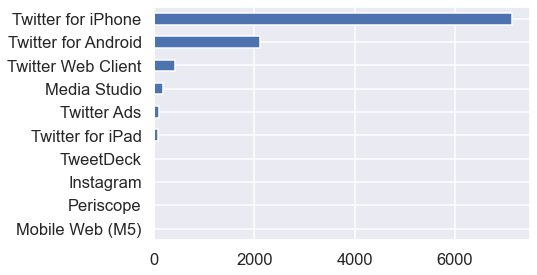

In [22]:
### BEGIN SOLUTION
df_trump['source'].value_counts(ascending= True).plot.barh()

### END SOLUTION

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [23]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [24]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [25]:
# df_trump['time'].dt.minute

df_trump['hour'] = df_trump['est_time'].apply(lambda x: x.hour+(x.minute/60)+(x.second/(60**2)))

df_trump['roundhour']=round(df_trump['hour']).astype('int64')
df_trump
# df_trump['roundhour']= 
# df_trump['est_time']
# df_trump['roundhour']
# df_trump.loc["690171032150237184"]
# print(690171032150237184 in df_trump.index)
# df_trump.loc[690171032150237184]['hour']

,time,source,text,retweet_count,est_time,hour,roundhour
id,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,2015-12-31 19:44:14-05:00,19.737222,20
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 00:18:23-05:00,0.306389,0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 01:08:06-05:00,1.135000,1
...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",14594,2018-10-16 10:04:32-05:00,10.075556,10
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,6271,2018-10-16 10:18:51-05:00,10.314167,10
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",13103,2018-10-16 10:26:33-05:00,10.442500,10


In [26]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

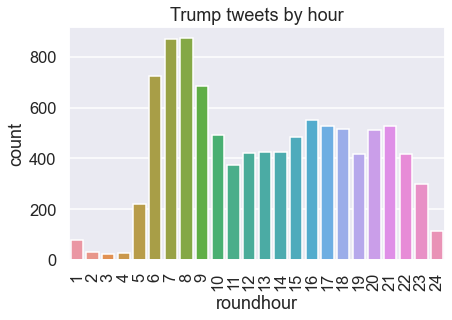

In [27]:
# make a bar plot here
### BEGIN SOLUTION
df_trumpv2 = df_trump.copy()

df_trumpv2['roundhour']=df_trumpv2['roundhour'].apply(lambda x:x+24 if x==0 else x)
ax = sns.countplot(data = df_trumpv2,x = 'roundhour')

ax.xaxis.set_tick_params(rotation= 90)
ax.set_title('Trump tweets by hour')
plt.show()


#     exit()
### END SOLUTION

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 


C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


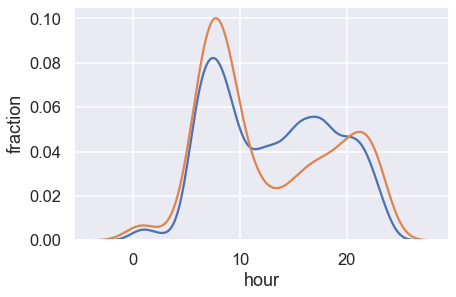

In [28]:
### BEGIN SOLUTION
### make your plot here

android = df_trump[df_trump['source']=='Twitter for Android']
iphone = df_trump[df_trump['source']=='Twitter for iPhone']
ax1 =plt.figure()
sns.distplot(iphone['hour'],hist=False,label = 'Iphone')
sns.distplot(android['hour'],hist=False, label = 'Android')
# plt.ylabel('fraction')
# ax1.set(ylabel = 'fraction')
plt.ylabel('fraction')
plt.show()
### END SOLUTION

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

![title](images/device_hour2.png)

C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

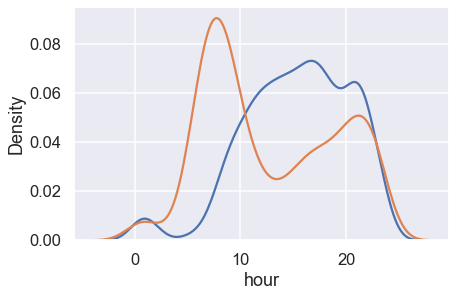

In [29]:
### BEGIN SOLUTION

# code to plot
# android = df_trump[df_trump['source']=='Twitter for Android' and df_trump[]]
# iphone = df_trump[df_trump['source']=='Twitter for iPhone']
# df_trump.dtypes
old = df_trump.loc[df_trump['time'].dt.year == 2016]
android = old[old['source']=='Twitter for Android']
iphone = old[old['source']=='Twitter for iPhone']
ax1 =plt.figure()
sns.distplot(iphone['hour'],hist=False,label = 'Iphone')
sns.distplot(android['hour'],hist=False, label = 'Android')
# df_trump['time'].dt.year
### END SOLUTION

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

This as mentioned are speculations because we truely don't know what his behavior was based strictly on data. However, given that he tweets mostly in the mornings in 2015 it would suggest that morning tweets done on android were from him. However there can be outliers of course 
* What time of the day the Android tweets were made by paid staff?

Likely the tweets made by paid staff would be the afternoon and late night tweets. However strictly from tweet data alone, it is not guarenteed

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [30]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![source_years.png](attachment:source_years.png)

C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


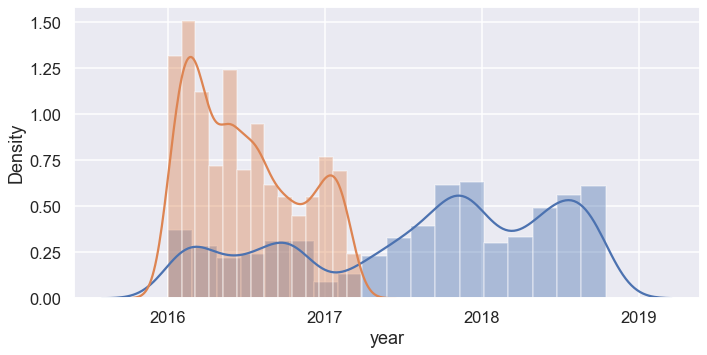

In [31]:
### BEGIN SOLUTION
plt.figure(figsize=(10,5))
android = df_trump[df_trump['source']=='Twitter for Android']
iphone = df_trump[df_trump['source']=='Twitter for iPhone']

sns.distplot(iphone['year'],label = 'Iphone')
sns.distplot(android['year'],label = 'Android')
plt.yticks(np.arange(0, 1.75, step=0.25))
plt.xticks(np.arange(2016,2020))
plt.show()
### END SOLUTION

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [32]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [33]:
### BEGIN SOLUTION
df = pd.read_csv('data/vader_lexicon.txt',sep='\t', header=None)
# df_sent.set_index([0, 1, 2, 3])
# df_sent.index
df_sent= pd.DataFrame()
df_sent['token'] = df[0]
df_sent['polarity'] = df[1]
# df_sent['std'] = df[2]
# df_sent['human_eval'] = df[3]
df_sent = df_sent.set_index('token')
# df_sent[:500]
df_sent
### END SOLUTION


,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [34]:

def calc_sent(text,df):
    sent = 0
    x = text.split(' ')
    for t in x:
        if t in df.index:
            sent+=df.loc[t]['polarity']
    return sent
    

In [35]:
### BEGIN SOLUTION
df_trump['text'] = df_trump['text'].str.lower()
# df_trump['sentiment'] = df_trump['est_time'].apply(lambda x: x.hour+(x.minute/60)+(x.second/(60**2)))
df_trump['sentiment'] = df_trump['text'].apply(lambda x:calc_sent(x,df_sent))
df_trump
# df_sent
### END SOLUTION

,time,source,text,retweet_count,est_time,hour,roundhour,year,sentiment
id,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2015-12-31 19:44:14-05:00,19.737222,20,2016.000000,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22,2016.000000,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 00:18:23-05:00,0.306389,0,2016.000000,0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1,2016.000000,7.3
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 01:08:06-05:00,1.135000,1,2016.000000,-3.0
...,...,...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,2018-10-16 10:04:32-05:00,10.075556,10,2018.789041,3.8
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,2018-10-16 10:18:51-05:00,10.314167,10,2018.789041,2.4
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,2018-10-16 10:26:33-05:00,10.442500,10,2018.789041,-4.8


### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [36]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'


### BEGIN SOLUTION
df_trump['no_punc']=df_trump['text'].str.replace(punct_re, " ")
df_trump
### END SOLUTION

<ipython-input-36-8ef77b82f70a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trump['no_punc']=df_trump['text'].str.replace(punct_re, " ")


,time,source,text,retweet_count,est_time,hour,roundhour,year,sentiment,no_punc
id,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2015-12-31 19:44:14-05:00,19.737222,20,2016.000000,3.1,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22,2016.000000,4.2,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 00:18:23-05:00,0.306389,0,2016.000000,0,happynewyearamerica https t co eeqb8pdrue
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1,2016.000000,7.3,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 01:08:06-05:00,1.135000,1,2016.000000,-3.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus
...,...,...,...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,2018-10-16 10:04:32-05:00,10.075556,10,2018.789041,3.8,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,2018-10-16 10:18:51-05:00,10.314167,10,2018.789041,2.4,conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,2018-10-16 10:26:33-05:00,10.442500,10,2018.789041,-4.8,is it really possible that bruce ohr whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier and who was used as a pawn in this whole scam witch hunt is still working for the department of justice can this really be so


In [37]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [38]:
df_trump_dup=df_trump.copy()
df_trump_dup =df_trump_dup.reset_index().drop_duplicates(subset='id',keep='first').set_index('id')

In [39]:
### BEGIN SOLUTION

tidy_format = df_trump['no_punc'].str.split(expand=True).stack().to_frame().reset_index(level=1).rename(columns={'level_1': 'num', 0: 'word'})

# tidy_format=df_trump_dup['no_punc'].str.split(expand=True).stack().to_frame().reset_index(level=1).rename(columns={'level_1': 'num', 0: 'word'})




tidy_format[:40]
# df_sep = df['text'].str.split(expand=True).stack().to_frame().reset_index()
# df_sep = df_sep.rename(columns={'level_1': 'num', 0: 'word'})
# tmp = df_sep.drop('num', axis=1)
### END SOLUTION

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews
682723973449289728,5,live
682723973449289728,6,with
682723973449289728,7,members
682723973449289728,8,of


In [40]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [41]:
df_trump['polarity'] = pd.merge(tidy_format,df_sent,left_on = 'word',right_index = True).reset_index().groupby('id').sum()['polarity']
df_trump['polarity'].replace(np.float64('nan'), 0, inplace = True)
df_trump








# with no dup
# df_trump_dup['polarity'] = pd.merge(tidy_format,df_sent,left_on = 'word',right_index = True).reset_index().groupby('id').sum()['polarity']
# df_trump_dup['polarity'].replace(np.float64('nan'), 0, inplace = True)
# df_trump_dup





# df_sent.index
# tidy_format.index

,time,source,text,retweet_count,est_time,hour,roundhour,year,sentiment,no_punc,polarity
id,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2015-12-31 19:44:14-05:00,19.737222,20,2016.000000,3.1,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22,2016.000000,4.2,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 00:18:23-05:00,0.306389,0,2016.000000,0,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1,2016.000000,7.3,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 01:08:06-05:00,1.135000,1,2016.000000,-3.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
...,...,...,...,...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,2018-10-16 10:04:32-05:00,10.075556,10,2018.789041,3.8,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...,6.9
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,2018-10-16 10:18:51-05:00,10.314167,10,2018.789041,2.4,conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions,-1.0
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,2018-10-16 10:26:33-05:00,10.442500,10,2018.789041,-4.8,is it really possible that bruce ohr whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier and who was used as a pawn in this whole scam witch hunt is still working for the department of justice can this really be so,-3.9


In [42]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [43]:
### BEGIN SOLUTION

print('Most negative tweets:')
# df_trump.drop_duplicates()
# df_trump[df_trump.polarity==df_trump.polarity.min()]

df_trump.sort_values('polarity')['text'].head().to_frame()





# df_trump_dup.sort_values('polarity')['text'].head().to_frame()


### END SOLUTION

Most negative tweets:


,text
id,
934080974773776384,"horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!"
934080974773776384,"horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!"
925931294705545216,"nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!"
925931294705545216,"nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!"
939480342779580416,"fake news cnn made a vicious and purposeful mistake yesterday. they were caught red handed, just like lonely brian ross at abc news (who should be immediately fired for his “mistake”). watch to see if @cnn fires those responsible, or was it just gross incompetence?"


In [44]:
### BEGIN SOLUTION

print('Most positive tweets:')
# df_trump[df_trump.polarity==df_trump.polarity.max()]

df_trump.sort_values('polarity',ascending = False)['text'].head().to_frame()
### END SOLUTION

Most positive tweets:


,text
id,
939560154269405184,"it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, just..."
939560154269405184,"it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, just..."
935493619204620288,"melania, our great and very hard working first lady, who truly loves what she is doing, always thought that “if you run, you will win.” she would tell everyone that, “no doubt, he will win.” i also felt i would win (or i would not have run) - and country is doing great!"
935493619204620288,"melania, our great and very hard working first lady, who truly loves what she is doing, always thought that “if you run, you will win.” she would tell everyone that, “no doubt, he will win.” i also felt i would win (or i would not have run) - and country is doing great!"
928918183104225280,"throughout my travels, i've had the pleasure of sharing the good news from america. i've had the honor of sharing our vision for a free &amp; open indo-pacific -- a place where sovereign &amp; independent nations, w/diverse cultures &amp; many different dreams, can all prospe..."


### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alden\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


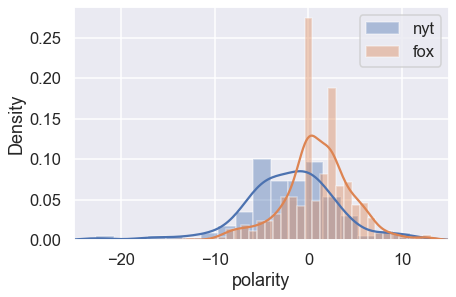

In [45]:
### BEGIN SOLUTION

nyt = df_trump[df_trump['text'].str.contains('nyt',case=False)]
fox = df_trump[df_trump['text'].str.contains('fox', case=False)]
sns.distplot(nyt['polarity'], label ='nyt')
sns.distplot(fox['polarity'], label = 'fox')
plt.legend()
plt.xlim(-25, 15)
plt.show()





# with no dupp
# nyt = df_trump_dup[df_trump_dup['text'].str.contains('nyt',case=False)]
# fox = df_trump_dup[df_trump_dup['text'].str.contains('fox', case=False)]
# sns.distplot(nyt['polarity'], label ='nyt')
# sns.distplot(fox['polarity'], label = 'fox')
# plt.legend()
# plt.xlim(-25, 15)
# plt.show()




### END SOLUTION

##### Comment on what you observe:

#### BEGIN SOLUTION
It seems he loves to use the word fox and 

#### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [46]:
### BEGIN SOLUTION
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('English')
stopwords.extend(['rt','t','co','https','realdonaldtrump','amp',"u",'hillary','trump2016','trump','clinton','http','ha','wa','0','1','2','3','4','5','6','7','8','9'])
# Remove numbers|
'''I removed numbers via the stopwords.extend'''
#create a dataframe called tmp to store all words appear in the tweets 
tmp = tidy_format.drop('num', axis=1)
#remove stopwords
tmp = tmp[~tmp['word'].isin(stopwords)]
#deal with plurals
Lem = WordNetLemmatizer()
tmp['word'] = tmp.word.apply(Lem.lemmatize)
tmp=tmp[~tmp['word'].str.contains('\d')]
#Remove words with only 1 or 2 length
tmp=tmp[~tmp['word'].str.len().isin([1,2])]

top50 = tmp['word'].value_counts().nlargest(50).to_frame()
tmp2 = tmp[tmp['word'].isin(top50.index)]
tmp2= tmp2.reset_index()
# tmp2

idlist = tmp2['id'].unique()
idlist = idlist[:5000]

# df_trump_dup  = df_trump.reset_index()










### END SOLUTION




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alden\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alden\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [47]:
### BEGIN SOLUTION
# PCA
from sklearn.decomposition import PCA
matrix = np.zeros((5000, 50))
words = top50.index

# words

# x= 0 
for i in range(5000):
    for j in range(50):
        something = df_trump_dup['text'].loc[idlist[i]]
        if isinstance(something, str):
            if (words[j]) in something.split():
                matrix[i][j] += 1
matrix
pca = PCA()
pca.fit(matrix)

# customPalette = sns.set_palette(sns.color_palette(colors))
# sns.choose_diverging_palette()

# pctick = 
# z = list(map(lambda x: 'PC'+x,pctick))
# pctick= ['PC'+str(i) for i in range(1,51)]
# ax = sns.heatmap(pca.components_, center=0,cmap =sns.diverging_palette(100, 400, as_cmap=True),yticklabels= words,xticklabels = pctick)
# print(pca.components_)
# print(pca.explained_variance_)


### END SOLUTION

PCA()

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/pca.png)



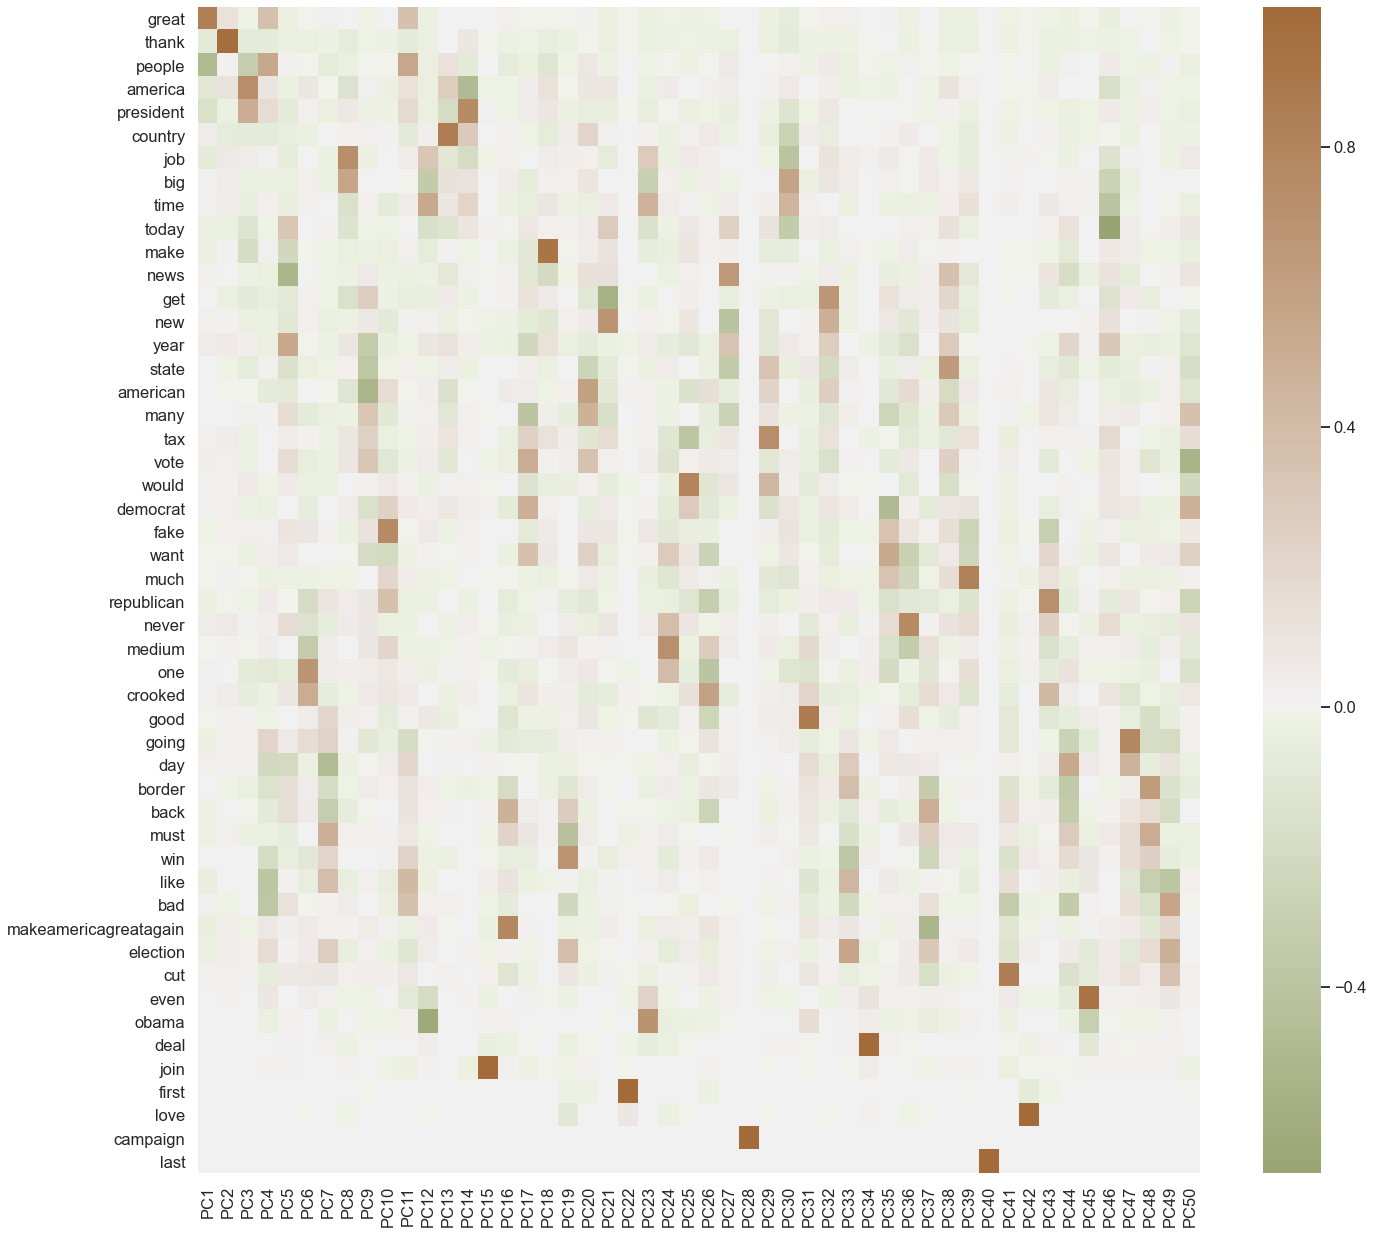

In [48]:
### BEGIN SOLUTION
fig = plt.figure(figsize =(20,20))
pctick= ['PC'+str(i) for i in range(1,51)]
ax = sns.heatmap(pca.components_, center=0,cmap =sns.diverging_palette(100, 400, as_cmap=True),yticklabels= words,xticklabels = pctick,cbar_kws=dict(ticks=[-0.8,-0.4,0.0,0.4,0.8]))
### END SOLUTION

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

C:\Users\Alden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

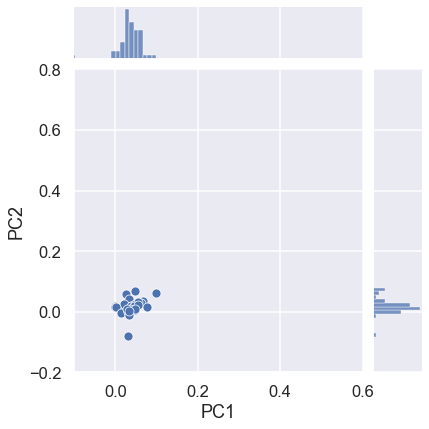

In [49]:
### BEGIN SOLUTION
import scipy.linalg as linalg
mu = matrix.mean(axis = 0)
fig = plt.figure(figsize =(20,20))
matrix_ =matrix - mu

Sigma = matrix_.T @ matrix / len(matrix_)
u,lam, uh = linalg.svd(Sigma)

pca1 = u[:,0]
pca2 = u[:,1]
pca2= (pca2 - pca2.mean())/ (pca2.max() - pca2.min())
pca1= (pca1 - pca1.mean())/ (pca1.max() - pca1.min())
ax = sns.jointplot(pca1, pca2,xlim= (-0.1,0.6),ylim = (-0.2,0.8,))
# ax.set_xlabel("Hour of the Day")
ax.ax_joint.set_xlabel('PC1')
ax.ax_joint.set_ylabel('PC2')
plt.show()

### END SOLUTION

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [50]:

### BEGIN SOLUTION

top_20 = tidy_format.groupby('word').filter(lambda x: len(x) >= 25).merge(df_trump_dup, how='inner', right_index=True, left_index=True).groupby('word').agg({'retweet_count': 'mean'}).sort_values(by='retweet_count', ascending=False)
# top_20.sum()
top_20 = top_20.iloc[0:20, :]
top_20

### END SOLUTION

,retweet_count
word,
jong,47904.387097
maybe,39590.666667
try,37130.531250
un,37000.590909
kim,36960.640000
old,36398.371429
christmas,33862.222222
short,33711.892857
kavanaugh,28651.962963


### Task 6.2
Plot a bar chart of your results:

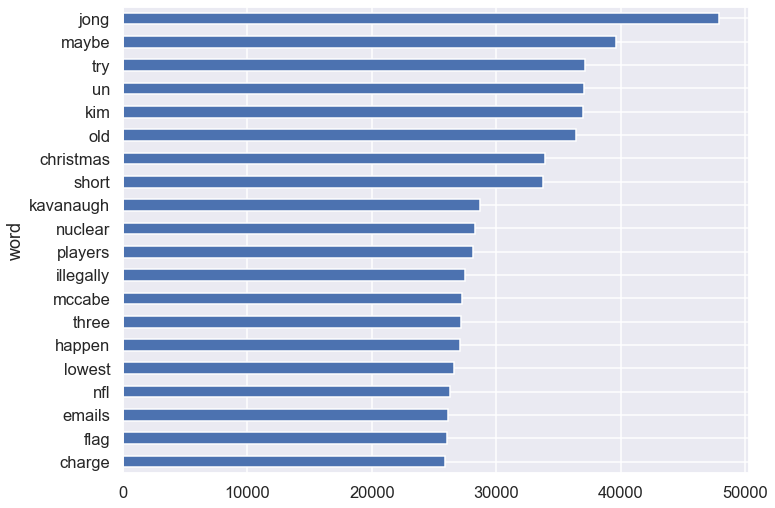

In [51]:
### BEGIN SOLUTION

top_20['retweet_count'].sort_values().plot.barh(figsize=(10, 8));
### BEGIN SOLUTION

## PART 7 - Conclusion (Optional for Individual)
What else can we do? Let us ask some open ended questions.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
      - That might be why 'un' is the most popular.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
      - Some may only have '#great' not 'great' which make the average lower
1. We didn't account for the fact that Trump's follower count has increased over time.
      - This can affect a lot. As Trump's follower count has increased, the more popular every word be

In [52]:
#### BEGIN SOLUTION
#plt.figure(figsize=(20,20))

#### END SOLUTION

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


In [53]:
#### BEGIN SOLUTION
df_trump


#### END SOLUTION


,time,source,text,retweet_count,est_time,hour,roundhour,year,sentiment,no_punc,polarity
id,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2015-12-31 19:44:14-05:00,19.737222,20,2016.000000,3.1,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22,2016.000000,4.2,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 00:18:23-05:00,0.306389,0,2016.000000,0,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1,2016.000000,7.3,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 01:08:06-05:00,1.135000,1,2016.000000,-3.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
...,...,...,...,...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,2018-10-16 10:04:32-05:00,10.075556,10,2018.789041,3.8,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...,6.9
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,2018-10-16 10:18:51-05:00,10.314167,10,2018.789041,2.4,conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions,-1.0
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,2018-10-16 10:26:33-05:00,10.442500,10,2018.789041,-4.8,is it really possible that bruce ohr whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier and who was used as a pawn in this whole scam witch hunt is still working for the department of justice can this really be so,-3.9


#### BEGIN SOLUTION
Discussion: "Enter question you tried answering"

Answer:
#### END SOLUTION

### Group Part - Find Something interesting (Optional for Individuals)
Is there still something interesting to find in this data set? Use your own imagination to ask some good questions. Don't be bias and look for the answer in data. Don't ask us what we want, because we do not know either. This will be for EXTRA CREDIT for individuals but part of the regular assignment for groups. Add any cells below.


<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as yourSection_yourNetID_midsemester.jpynb<br>
<b> Group Projects:</b> Each person in the group must submit a copy with both names listed. If you are doing a group project, you must inform your TA prior to 11/3/21 that you intend to work as a group and submit your name and your partner name. We will <b>not accept group work</b> if your TA has not been notified.<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; midsemester (remove all output. Do not submit data files<br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2019-2021 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez